Correlation between Price and Feedback Score: -0.02

Cross-tabulation between Auction Type and Store URL Flag:
remainder__Store URL_flag      0       1
cat__Listing Type_Auction               
0.0                        20732  104559
1.0                          997    1490


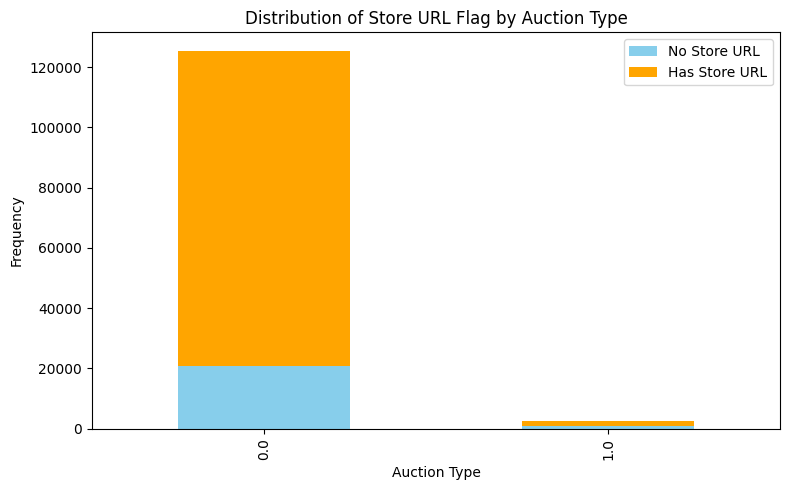


Average Price by Listing Type:
cat__Listing Type_Auction
0.0    27.877047
1.0    18.840036
Name: remainder__Price_in_USD, dtype: float64


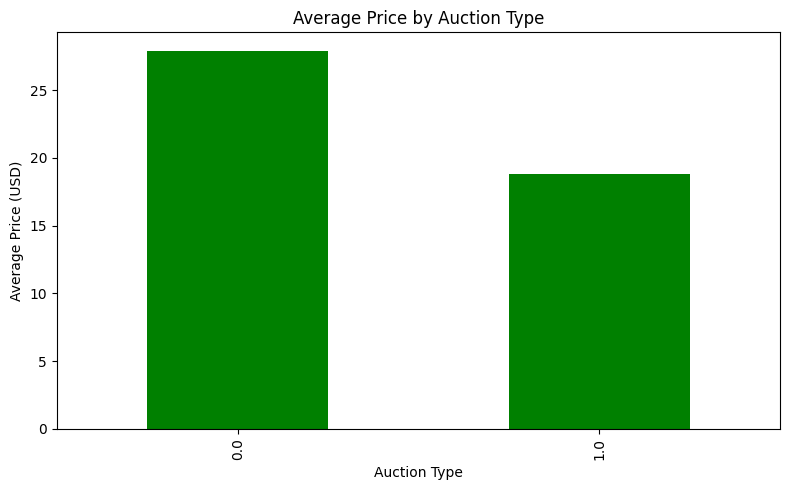

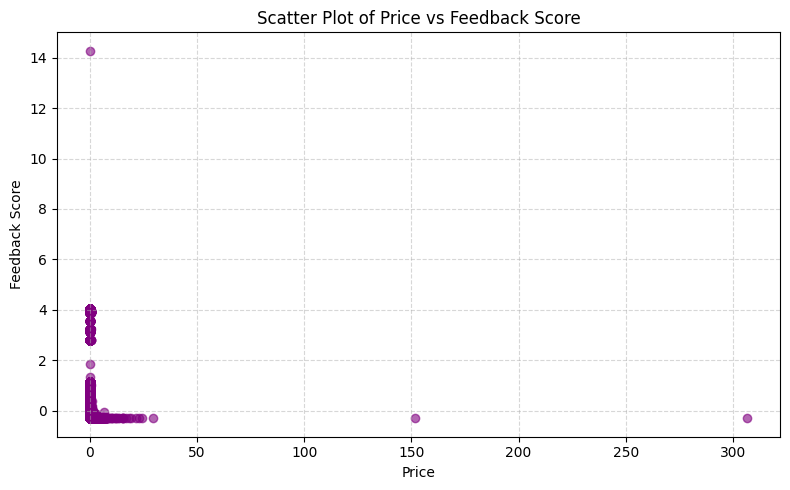


Price distribution by Fixed Price and Auction type:
cat__Listing Type_FixedPrice  cat__Listing Type_Auction
0.0                           0.0                          47.776502
                              1.0                          18.840036
1.0                           0.0                          27.768937
Name: remainder__Price_in_USD, dtype: float64


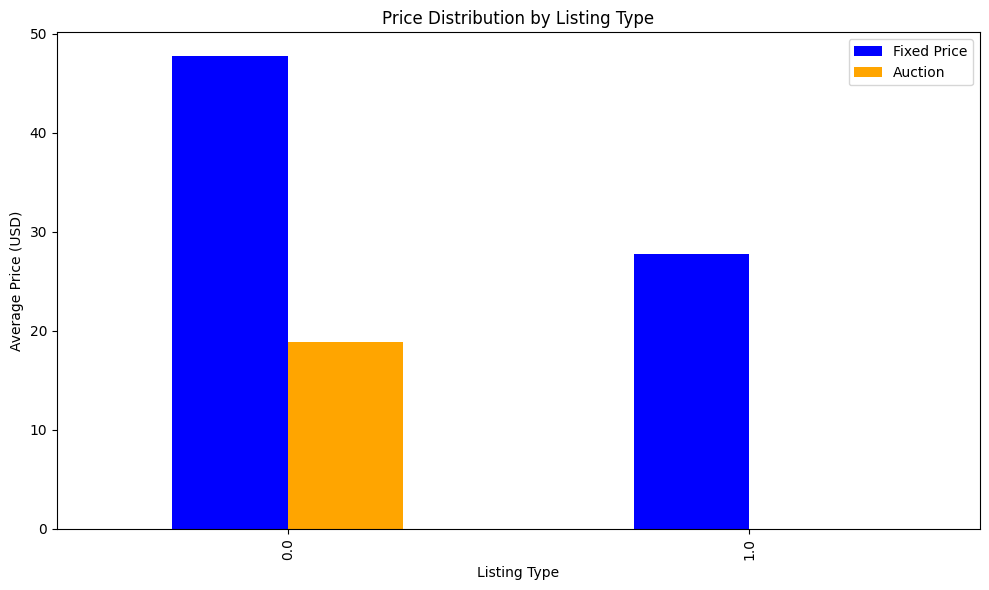

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/raman/Downloads/transformed_ebay_data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Drop 'Unnamed: 0' if present (common with saved CSVs)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Fill missing values to avoid errors (e.g., for NaN entries)
df = df.fillna(0)

# 1. Correlation Analysis
if 'num__Price' in df.columns and 'num__Feedback Score' in df.columns:
    correlation = df['num__Price'].corr(df['num__Feedback Score'])
    print(f"Correlation between Price and Feedback Score: {correlation:.2f}")
else:
    print("Columns 'num__Price' or 'num__Feedback Score' are not present in the DataFrame.")

# 2. Cross-tabulation
if 'cat__Listing Type_Auction' in df.columns and 'remainder__Store URL_flag' in df.columns:
    cross_tab = pd.crosstab(df['cat__Listing Type_Auction'], df['remainder__Store URL_flag'])
    print("\nCross-tabulation between Auction Type and Store URL Flag:")
    print(cross_tab)

    # Visualizing the cross-tabulation
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'])
    plt.title("Distribution of Store URL Flag by Auction Type")
    plt.xlabel("Auction Type")
    plt.ylabel("Frequency")
    plt.legend(["No Store URL", "Has Store URL"])
    plt.tight_layout()
    plt.show()

# 3. Average Price by Listing Type
if 'cat__Listing Type_Auction' in df.columns and 'remainder__Price_in_USD' in df.columns:
    avg_price_by_listing_type = df.groupby('cat__Listing Type_Auction')['remainder__Price_in_USD'].mean()
    print("\nAverage Price by Listing Type:")
    print(avg_price_by_listing_type)

    # Visualizing the average price
    avg_price_by_listing_type.plot(kind='bar', color='green', figsize=(8, 5))
    plt.title("Average Price by Auction Type")
    plt.ylabel("Average Price (USD)")
    plt.xlabel("Auction Type")
    plt.tight_layout()
    plt.show()

# 4. Scatter Plot: Price vs Feedback Score
if 'num__Price' in df.columns and 'num__Feedback Score' in df.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(df['num__Price'], df['num__Feedback Score'], alpha=0.6, color='purple')
    plt.title("Scatter Plot of Price vs Feedback Score")
    plt.xlabel("Price")
    plt.ylabel("Feedback Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 5. Insights from Price Distribution by Listing Type
if 'cat__Listing Type_FixedPrice' in df.columns and 'cat__Listing Type_Auction' in df.columns:
    listing_type_prices = df.groupby(['cat__Listing Type_FixedPrice', 'cat__Listing Type_Auction'])['remainder__Price_in_USD'].mean()
    print("\nPrice distribution by Fixed Price and Auction type:")
    print(listing_type_prices)

    # Visualizing with a grouped bar chart
    listing_type_prices.unstack().plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
    plt.title("Price Distribution by Listing Type")
    plt.ylabel("Average Price (USD)")
    plt.xlabel("Listing Type")
    plt.legend(["Fixed Price", "Auction"])
    plt.tight_layout()
    plt.show()



In [4]:
print(df.columns)

Index(['num__Price', 'num__Feedback Score', 'cat__Listing Type_Auction',
       'cat__Listing Type_AuctionWithBIN', 'cat__Listing Type_FixedPrice',
       'cat__Listing Type_StoreInventory', 'cat__Shipping Type_Calculated',
       'cat__Shipping Type_CalculatedDomesticFlatInternational',
       'cat__Shipping Type_Flat',
       'cat__Shipping Type_FlatDomesticCalculatedInternational',
       'cat__Shipping Type_Free', 'cat__Shipping Type_FreePickup',
       'cat__Shipping Type_Freight', 'cat__Shipping Type_NotSpecified',
       'cat__Top Rated Seller_False', 'cat__Top Rated Seller_True',
       'cat__Condition_Acceptable', 'cat__Condition_Brand New',
       'cat__Condition_Certified - Refurbished',
       'cat__Condition_For parts or not working', 'cat__Condition_Good',
       'cat__Condition_Like New', 'cat__Condition_New',
       'cat__Condition_New other (see details)', 'cat__Condition_New with box',
       'cat__Condition_New with defects', 'cat__Condition_New with tags',
       'c

In [11]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train after dropping


In [12]:
X_train = X_train.fillna(X_train.mean())  # Replace NaNs with the mean of each column


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a pipeline with imputation and regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', LinearRegression())             # Apply linear regression
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Mean Squared Error: 0.00
R-squared: 1.00


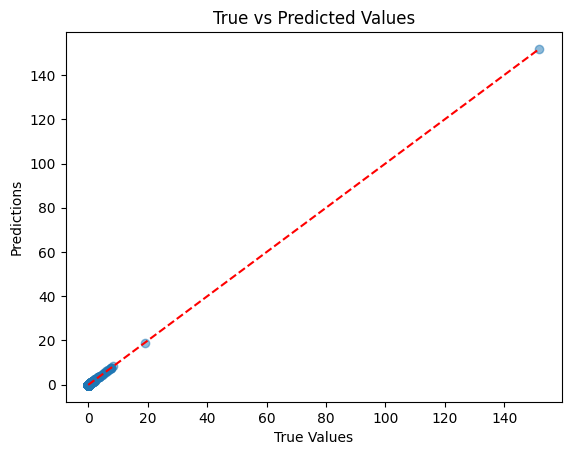

Feature Coefficients: [ 1.81620726e-09  4.47157853e-05 -2.53935191e-04 -1.16484190e-05
 -1.67422659e-06  2.66127408e-04  5.60398169e-09  1.00848942e-03
 -7.49804719e-04  1.31004144e-05 -1.20067907e-04  1.82337050e-04
 -7.20848026e-11 -3.34171592e-04 -6.49727375e-06  6.49739477e-06
  1.39678018e-03  1.71883411e-03  1.52447948e-03  9.90393339e-04
  1.58749866e-03  1.43745039e-03  1.32222280e-03  1.11481788e-03
  1.25857278e-03  1.09578630e-03  1.21843944e-03  1.37568340e-03
  1.20939862e-03  7.10681514e-14 -2.32171445e-02  1.20746592e-03
  1.26761009e-03  1.67596131e-03  9.55279364e-04  1.36485898e-03
 -5.04388551e-04  8.03945854e-10  8.67361738e-17 -1.37234064e-03
  9.83134399e-08 -6.16661063e-09 -9.20022563e-06  1.25846002e-04
 -1.12733191e-05  5.29580912e-09 -1.48400470e-09  2.22097311e-08
 -5.92305085e-09 -1.82721291e-10 -2.20298435e-07  2.19159479e-07
  8.58015803e-10  0.00000000e+00  1.88434695e-07  5.63578394e-05
 -1.32069494e-05 -1.32069424e-05 -4.02428315e-02  3.06805095e-03]
Pi

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Sample Data Preparation (replace with your data loading step)
# X_train, X_test, y_train, y_test should be defined already

# Create a pipeline with imputation and linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', LinearRegression())             # Apply linear regression
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

# Check feature coefficients
coefficients = pipeline.named_steps['regressor'].coef_
print("Feature Coefficients:", coefficients)

# Save the trained pipeline to a file
joblib.dump(pipeline, 'regression_pipeline.pkl')
print("Pipeline saved as 'regression_pipeline.pkl'")

# Load the pipeline (optional, uncomment if needed)
# loaded_pipeline = joblib.load('regression_pipeline.pkl')
# new_predictions = loaded_pipeline.predict(new_X)
# print("New Predictions:", new_predictions)


In [19]:
# Assuming you have a test set X_test and y_test
y_test_pred = pipeline.predict(X_test)

# Calculate MSE and R-squared for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")


Test Mean Squared Error: 0.00
Test R-squared: 1.00


C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Create a pipeline with imputation and regularized regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', Ridge(alpha=1.0))  # Add regularization
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {cv_scores}")

# Test the model on unseen data
y_test_pred = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")


C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34855e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.68851e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6864e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.68471e-27): result may not be accurate.
  return linalg.solve(

Cross-validated R-squared scores: [0.99999124 0.99939529 0.99819134 0.9997654  0.9998808 ]
Test Mean Squared Error: 0.00
Test R-squared: 1.00


C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.68167e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07211e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline saved as 'regression_pipeline.pkl'
Test Mean Squared Error: 0.00
Test R-squared: 1.00


C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34195e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34165e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34059e-27): result may not be accurate.
  return linalg.solve(A,

Cross-validated R-squared scores: [0.99998855 0.99932767 0.9980958  0.99961557 0.99968031]


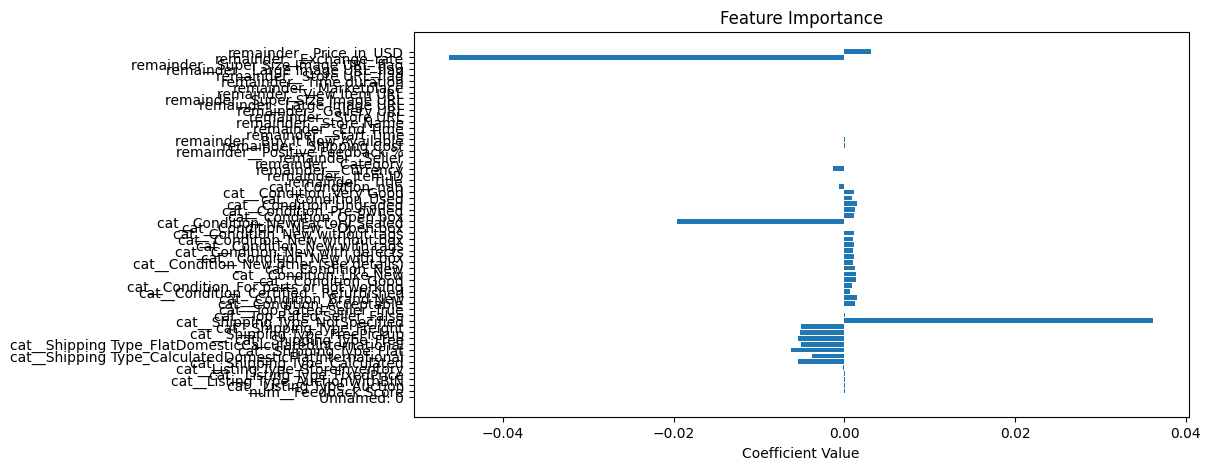

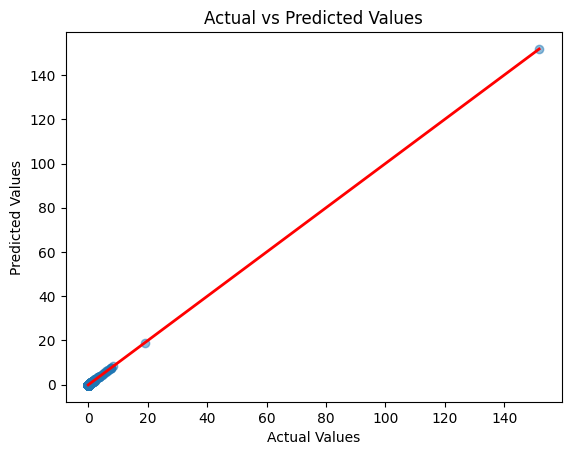

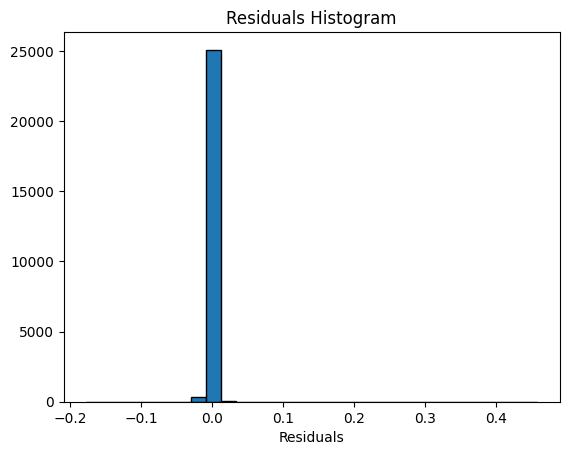

C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34236e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3421e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34042e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34103e-28): result may not be accurate.
  return linalg.solve(

Best parameters found: {'regressor__alpha': 1.0}
Best cross-validated R-squared score: 0.9993415804057942
Loaded pipeline Test Mean Squared Error: 0.00
Loaded pipeline Test R-squared: 1.00


C:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07211e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data (replace this with your actual dataset)
# X = features, y = target variable
# Example:
# X = pd.DataFrame(...)  # Your feature matrix
# y = pd.Series(...)     # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and Ridge regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', Ridge(alpha=1.0))              # Ridge regression with alpha as a placeholder
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline to a file
joblib.dump(pipeline, 'regression_pipeline.pkl')
print("Pipeline saved as 'regression_pipeline.pkl'")

# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse:.2f}")
print(f"Test R-squared: {r2:.2f}")

# Cross-validated R-squared scores
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {cv_scores}")

# Plot feature coefficients if using Ridge regression
feature_names = X_train.columns
coefficients = pipeline.named_steps['regressor'].coef_

plt.figure(figsize=(10, 5))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

# Plot Actual vs Predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Ideal line
plt.show()

# Plot residuals
residuals = y_test - y_test_pred
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

# Optional: Hyperparameter tuning using GridSearchCV
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated R-squared score:", grid_search.best_score_)

# Reload and test the saved pipeline (optional)
loaded_pipeline = joblib.load('regression_pipeline.pkl')
new_predictions = loaded_pipeline.predict(X_test)

# Evaluate again with the loaded pipeline
new_mse = mean_squared_error(y_test, new_predictions)
new_r2 = r2_score(y_test, new_predictions)
print(f"Loaded pipeline Test Mean Squared Error: {new_mse:.2f}")
print(f"Loaded pipeline Test R-squared: {new_r2:.2f}")
